In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/balanced_sclaer_dataset_diabetes.csv')

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.isnull().sum().sum()

0

In [6]:
y = df["Diabetes_012"]
X = df.drop(["Diabetes_012"], axis=1)

In [7]:
# классификация

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [8]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.00
|   |--- feature_13 <= 0.25
|   |   |--- feature_18 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_18 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_13 >  0.25
|   |   |--- feature_13 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_13 >  0.50
|   |   |   |--- class: 0.0
|--- feature_0 >  0.00
|   |--- feature_0 <= 1.00
|   |   |--- feature_18 <= 0.01
|   |   |   |--- class: 0.0
|   |   |--- feature_18 >  0.01
|   |   |   |--- class: 1.0
|   |--- feature_0 >  1.00
|   |   |--- feature_1 <= 0.00
|   |   |   |--- class: 2.0
|   |   |--- feature_1 >  0.00
|   |   |   |--- class: 2.0



In [10]:
target_names = list(map(str, y.unique()))
features = list(df.columns)[:-1]

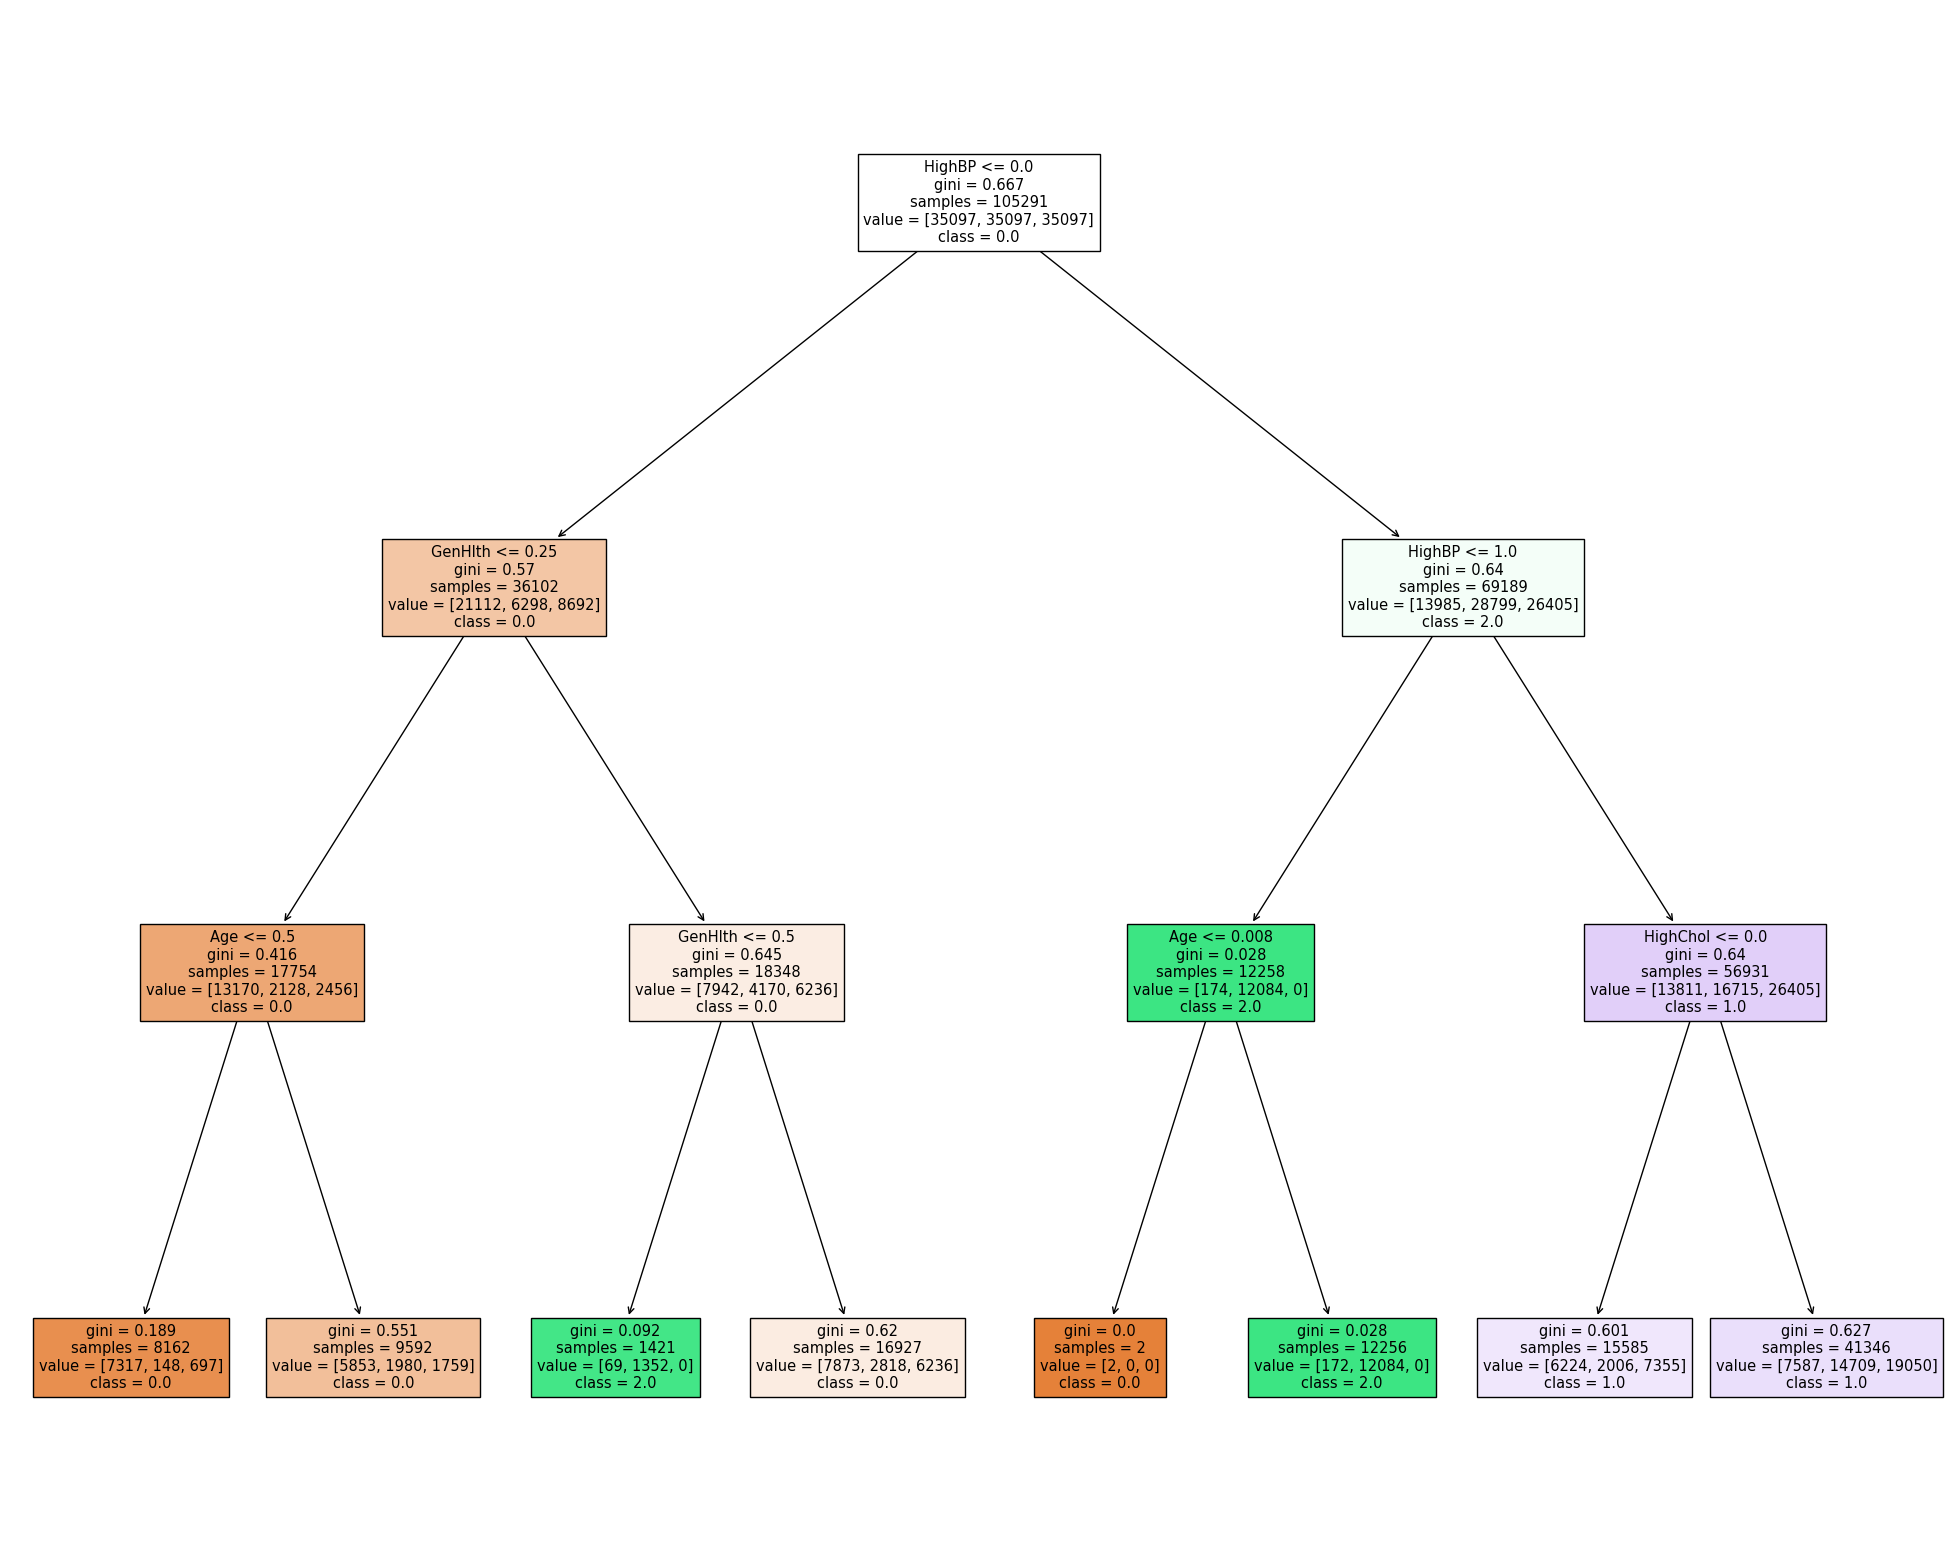

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=features, class_names=target_names, filled=True)